In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel,roberts, scharr, prewitt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import xarray as xr
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import meijering, sato, frangi, hessian
import cv2
from scipy import ndimage as nd
from skimage import util, exposure, data
import pywt
from skimage.feature import greycomatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
my_arrays_final = np.load('/content/drive/MyDrive/Augmented Data/numpy_data.npz', allow_pickle=True)

In [ ]:
# Extract the X_train, y_train, X_test, and y_test arrays from the data
X_train = my_arrays_final['X_train']
y_train = my_arrays_final['y_train']
X_test = my_arrays_final['X_test']
y_test = my_arrays_final['y_test']

In [ ]:
# Print the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6050, 100, 100, 1)
y_train shape: (6050,)
X_test shape: (1513, 100, 100, 1)
y_test shape: (1513,)


In [ ]:
X_train_r = X_train.reshape(X_train.shape[0], 100,100)
X_test_r = X_test.reshape (X_test. shape[0], 100, 100)

In [ ]:
X_test_r.shape

(1513, 100, 100)

In [ ]:
X=np.vstack((X_train_r,X_test_r))
X.shape

(7563, 100, 100)

In [ ]:
Y=np.hstack((y_train,y_test))
Y.shape

(7563,)

In [ ]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(Y)
labels_encoded = le.transform(Y)
labels_encoded

array([2, 2, 0, ..., 0, 2, 2])

In [ ]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        #Reset dataframe to blank after each loop.
        df_1 = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        df_2 = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        df_3 = pd.DataFrame()   #Temporary data frame to capture information for each loop.
        # df_3['SHI-TOM','TOM']


        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
        hist,bins = np.histogram(img.ravel(),64,[0,256])
        df_2= pd.DataFrame(hist).transpose()
        df_2.columns=np.floor(bins[1:])
        
        #Append features from current image to the dataset
        # image_dataset_1= pd.concat([image_dataset, df], axis=0)
        # image_dataset=df


        #GLCM = graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = graycomatrix(img, [1], [0])       
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df_1['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df_1['Corr'] = GLCM_corr       
        GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        df_1['Diss_sim'] = GLCM_diss       
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df_1['Homogen'] = GLCM_hom       
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df_1['Contrast'] = GLCM_contr

        GLCM2 = graycomatrix(img, [3], [0])       
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df_1['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df_1['Corr2'] = GLCM_corr2       
        GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        df_1['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df_1['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df_1['Contrast2'] = GLCM_contr2

        GLCM3 = graycomatrix(img, [5], [0])       
        GLCM_Energy3 = graycoprops(GLCM3, 'energy')[0]
        df_1['Energy3'] = GLCM_Energy3
        GLCM_corr3 = graycoprops(GLCM3, 'correlation')[0]
        df_1['Corr3'] = GLCM_corr3       
        GLCM_diss3 = graycoprops(GLCM3, 'dissimilarity')[0]
        df_1['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = graycoprops(GLCM3, 'homogeneity')[0]
        df_1['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = graycoprops(GLCM3, 'contrast')[0]
        df_1['Contrast3'] = GLCM_contr3

        GLCM4 = graycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = graycoprops(GLCM4, 'energy')[0]
        df_1['Energy4'] = GLCM_Energy4
        GLCM_corr4 = graycoprops(GLCM4, 'correlation')[0]
        df_1['Corr4'] = GLCM_corr4       
        GLCM_diss4 = graycoprops(GLCM4, 'dissimilarity')[0]
        df_1['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = graycoprops(GLCM4, 'homogeneity')[0]
        df_1['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = graycoprops(GLCM4, 'contrast')[0]
        df_1['Contrast4'] = GLCM_contr4
        
        GLCM5 = graycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = graycoprops(GLCM5, 'energy')[0]
        df_1['Energy5'] = GLCM_Energy5
        GLCM_corr5 = graycoprops(GLCM5, 'correlation')[0]
        df_1['Corr5'] = GLCM_corr5       
        GLCM_diss5 = graycoprops(GLCM5, 'dissimilarity')[0]
        df_1['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = graycoprops(GLCM5, 'homogeneity')[0]
        df_1['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = graycoprops(GLCM5, 'contrast')[0]
        df_1['Contrast5'] = GLCM_contr5


        s_entropy=shannon_entropy(img)
        df_1['shannon_entropy'] = s_entropy
        
        dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
        # img_1 = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
        # dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

        #Shift DFT. First check the output without the shift
        dft_shift = np.fft.fftshift(dft)

        #Calculate magnitude spectrum from the DFT
        #Added 1 as we may see 0 values and log of 0 is indeterminate
        magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
        magnitude_spectrum.shape
        df_1['fourier_1'] = magnitude_spectrum[0].sum()
        df_1['fourier_2'] = magnitude_spectrum[1].sum()


        # df= pd.concat([df_2, df_1], axis=1)
       ################################################################
        # img=x_train[0]
        # plt.imshow(img)

        # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # SHI-TOMASI METHOD
        corners = cv2.goodFeaturesToTrack(img, maxCorners=1000,
                        qualityLevel=0.01, minDistance=.01)
        # print(corners.shape)
        a = np.array([len(corners)])
        df_3['SHI-TOM']= a
        # print(len(corners))


        # print(len(corners))

        corners = cv2.goodFeaturesToTrack(img, maxCorners=1000,
                qualityLevel=0.01, minDistance=.01,
                useHarrisDetector=True, k=0.04)
        # corners = np.int0(corners)
        a = np.array([len(corners)])
        df_3['TOM']= a

          # Initiate FAST object with default values
        fast = cv2.FastFeatureDetector_create()
          # find and draw the keypoints
        kp = fast.detect(img,None)
          # img2 = cv.drawKeypoints(img, kp, None, color=(0,0,255))
          # # Print all default params
        a = np.array([len(kp)])
        df_3['Keypoints']= a
       ################################################################

        df_4 = pd.DataFrame()

        img2 = img.reshape(-1)
        df_4['Original Image'] = img2
        # entropy_img = entropy(img, disk(4))

        entropy_img = entropy(img, disk(1))
        entropy1 = entropy_img.reshape(-1)
        df_4['Entropy'] = entropy1

        gaussian_img = nd.gaussian_filter(img, sigma=4)
        gaussian_img1 = gaussian_img.reshape(-1)
        df_4['Gaussian s4'] = gaussian_img1

        sobel_img = sobel(img)
        sobel1 = sobel_img.reshape(-1)
        df_4['Sobel'] = sobel1

        meijering_img = meijering(img)
        meijering1 = meijering_img.reshape(-1)
        df_4['meijering'] = meijering1

        sato_img = sato(img)
        sato1 = sato_img.reshape(-1)
        df_4['sato'] = sato1        
        
        frangi_img = frangi(img)
        frangi1 = frangi_img.reshape(-1)
        df_4['frangi'] = frangi1  


        # hessian_img = hessian(img)
        # hessian1 = hessian_img.reshape(-1)
        # df_4['hessian'] = hessian1  

        #ROBERTS EDGE
        edge_roberts = roberts(img)
        edge_roberts1 = edge_roberts.reshape(-1)
        df_4['Roberts'] = edge_roberts1

        #SCHARR
        edge_scharr = scharr(img)
        edge_scharr1 = edge_scharr.reshape(-1)
        df_4['Scharr'] = edge_scharr1

        #PREWITT
        edge_prewitt = prewitt(img)
        edge_prewitt1 = edge_prewitt.reshape(-1)
        df_4['Prewitt'] = edge_prewitt1

        # #GAUSSIAN with sigma=8
        # # gaussian_img2 = nd.gaussian_filter(img, sigma=8)
        # # gaussian_img3 = gaussian_img2.reshape(-1)
        # # df_4['Gaussian s8'] = gaussian_img3

        #MEDIAN with sigma=3
        median_img = nd.median_filter(img, size=3)
        median_img1 = median_img.reshape(-1)
        df_4['Median s3'] = median_img1

        # MEDIAN with sigma=7
        median_img2 = nd.median_filter(img, size=7)
        median_img3 = median_img2.reshape(-1)
        df_4['Median s7'] = median_img3

        #VARIANCE with size=3
        variance_img = nd.generic_filter(img, np.var, size=3)
        variance_img1 = variance_img.reshape(-1)
        df_4['Variance s3'] = variance_img1

        #VARIANCE with size=7
        # variance_img2 = nd.generic_filter(img, np.var, size=7)
        # variance_img3 = variance_img2.reshape(-1)
        # df_4['Variance s7'] = variance_img3 


        # df_4=df_4.sum(axis=0)
        # df_4=df_4.to_frame()
        # df_4=df_4.T
        df_5=df_4.describe()
        df_5.drop(['count','min','max'],axis=0,inplace = True)
        df_5_5=df_5.sum(axis=0)
        df_6=df_5.T
        df_6['sum']=df_5_5
        # df_7=df_6.iloc[:,1:]
        df_7=df_6.to_numpy().flatten()

        strs=[]

        for i in range(len(df_6.index)):
          for j in range(len(df_6.columns)):
            st=(f'{df_6.columns[j]}_{df_6.index[i]}')
            strs.append(st)

        columns = np.array(strs)
        df_8 = pd.DataFrame(df_7)
        df_9=df_8.T
        df_9.columns = columns

        # df= pd.concat([df, df_3], axis=0)
        df_10=pd.DataFrame()

        # img =cv2.imread( '/content/drive/MyDrive/data3a/training/01-minor/0001.JPEG')
        #plt. imshow(img, cmap='gray'), img.shape
        # gray_img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # gray_img.shape
        _,bin_img =cv2.threshold(img,0,255, cv2.THRESH_BINARY)
        #  (gray_img, 100, 255, cv2.THRESH _BINARY)
        #plt.imshow(bin_img, cmap='gray)
        M =cv2.moments (bin_img)
        #print M)
        df_10 = pd.DataFrame.from_dict(M,orient ='index')
        df_11=df_10.T


        df= pd.concat([df_2, df_1,df_3,df_9,df_11], axis=1)

        # df= pd.concat([df, df_3], axis=0)


        # df= pd.concat([df_2, df_1,df_3,df_4], axis=1)

        image_dataset= pd.concat([image_dataset, df], ignore_index= True)

        #Append features from current image to the dataset
        # image_dataset=df

        # # #Append features from current image to the dataset
        # # image_dataset= pd.concat([image_dataset, df], axis=0)
        # # # image_dataset=df
    return image_dataset

In [ ]:
X.dtype

dtype('float64')

In [ ]:
X_scaled = exposure.rescale_intensity(X, out_range=(0, 1))

bin_width = 32
im = util.img_as_ubyte(X_scaled)
X_binned = im//bin_width

In [ ]:
X_binned.dtype

dtype('uint8')

In [ ]:
#Extract features from training images
image_features = feature_extractor(X_binned)
X_for_ML_GLCM_2 =image_features
X_for_ML_GLCM_2.shape

(7563, 197)

In [ ]:
X_for_ML_GLCM_2

,4.0,8.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,40.0,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,3682,6318,0,0,0,0,0,0,0,0,...,1.801249e+09,-1.716957e+09,3.027403e+09,0.000376,0.000009,0.000369,3.668942e-08,2.201981e-07,-2.098936e-07,3.700923e-07
1,5916,4084,0,0,0,0,0,0,0,0,...,4.960274e+08,-2.004762e+08,1.538038e+09,0.000338,0.000002,0.000337,-1.110932e-07,5.021905e-08,-2.029671e-08,1.557148e-07
2,4832,5168,0,0,0,0,0,0,0,0,...,8.911498e+08,-1.362886e+09,3.857532e+08,0.000346,0.000006,0.000345,-2.680146e-07,9.728252e-08,-1.487797e-07,4.211081e-08
3,8903,1097,0,0,0,0,0,0,0,0,...,-1.726348e+09,1.609714e+09,1.024628e+09,0.000328,0.000010,0.000333,-3.013729e-08,-1.782142e-07,1.661738e-07,1.057742e-07
4,6553,3447,0,0,0,0,0,0,0,0,...,-5.062713e+09,-1.196212e+09,7.932309e+09,0.000294,0.000067,0.000482,-1.369256e-06,-1.180837e-06,-2.790069e-07,1.850148e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,5928,4072,0,0,0,0,0,0,0,0,...,6.712936e+08,-6.085418e+08,4.270107e+09,0.000345,0.000006,0.000347,-3.157616e-07,7.259300e-08,-6.580709e-08,4.617650e-07
7559,4944,5056,0,0,0,0,0,0,0,0,...,3.006939e+09,-1.078439e+08,9.659872e+09,0.000381,0.000013,0.000359,-5.506789e-07,3.843856e-07,-1.378599e-08,1.234849e-06
7560,3954,6046,0,0,0,0,0,0,0,0,...,4.609909e+08,1.176716e+07,2.028328e+09,0.000334,-0.000003,0.000333,9.264330e-08,4.658864e-08,1.189212e-09,2.049868e-07
7561,7036,2964,0,0,0,0,0,0,0,0,...,-1.096920e+09,4.968123e+07,4.385604e+09,0.000364,0.000026,0.000379,-7.038300e-07,-1.434943e-07,6.499079e-09,5.737054e-07


In [ ]:
X_for_ML_GLCM_2.to_csv('/content/drive/MyDrive/Augmented Data/Updated_X_for_ML.csv', index = False)

In [ ]:
X_for_ML_GLCM_2=pd.read_csv('/content/drive/MyDrive/Augmented Data/data_X_for_ML_all_data.csv')

In [ ]:
X_for_ML_GLCM_2=pd.read_csv('/content/drive/MyDrive/Augmented Data/Updated_X_for_ML.csv')

In [ ]:
type(X_for_ML_GLCM_2), X_for_ML_GLCM_2.shape

(pandas.core.frame.DataFrame, (7563, 198))

In [ ]:
X_for_ML_GLCM_2

,Unnamed: 0,4.0,8.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,0,3682,6318,0,0,0,0,0,0,0,...,1.801249e+09,-1.716957e+09,3.027403e+09,0.000376,0.000009,0.000369,3.668942e-08,2.201981e-07,-2.098936e-07,3.700923e-07
1,1,5916,4084,0,0,0,0,0,0,0,...,4.960274e+08,-2.004762e+08,1.538038e+09,0.000338,0.000002,0.000337,-1.110932e-07,5.021905e-08,-2.029671e-08,1.557148e-07
2,2,4832,5168,0,0,0,0,0,0,0,...,8.911498e+08,-1.362886e+09,3.857532e+08,0.000346,0.000006,0.000345,-2.680146e-07,9.728252e-08,-1.487797e-07,4.211081e-08
3,3,8903,1097,0,0,0,0,0,0,0,...,-1.726348e+09,1.609714e+09,1.024628e+09,0.000328,0.000010,0.000333,-3.013729e-08,-1.782142e-07,1.661738e-07,1.057742e-07
4,4,6553,3447,0,0,0,0,0,0,0,...,-5.062713e+09,-1.196212e+09,7.932309e+09,0.000294,0.000067,0.000482,-1.369256e-06,-1.180837e-06,-2.790069e-07,1.850148e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,7558,5928,4072,0,0,0,0,0,0,0,...,6.712936e+08,-6.085418e+08,4.270107e+09,0.000345,0.000006,0.000347,-3.157616e-07,7.259300e-08,-6.580709e-08,4.617650e-07
7559,7559,4944,5056,0,0,0,0,0,0,0,...,3.006939e+09,-1.078439e+08,9.659872e+09,0.000381,0.000013,0.000359,-5.506789e-07,3.843856e-07,-1.378599e-08,1.234849e-06
7560,7560,3954,6046,0,0,0,0,0,0,0,...,4.609909e+08,1.176716e+07,2.028328e+09,0.000334,-0.000003,0.000333,9.264330e-08,4.658864e-08,1.189212e-09,2.049868e-07
7561,7561,7036,2964,0,0,0,0,0,0,0,...,-1.096920e+09,4.968123e+07,4.385604e+09,0.000364,0.000026,0.000379,-7.038300e-07,-1.434943e-07,6.499079e-09,5.737054e-07


In [ ]:
# list(X_for_ML_GLCM_2.columns)

In [ ]:
# momments=X_for_ML_GLCM_2.loc[:,['m00','m10','m01','m20','m11','m02','m30','m21','m12','m03','mu20','mu11','mu02','mu30','mu21','mu12','mu03','nu20','nu11','nu02','nu30','nu21','nu12','nu03']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

Data_norm = mms.fit_transform(X_for_ML_GLCM_2)


In [ ]:
new_data = pd.DataFrame(data=Data_norm,
                           columns=X_for_ML_GLCM_2.columns)

In [ ]:
new_data

,Unnamed: 0,4.0,8.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,0.000000,0.349278,0.650722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.559661,0.426303,0.535747,0.077205,0.544002,0.160113,0.852666,0.706441,0.490703,0.445080
1,0.000132,0.579588,0.420412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.507501,0.483213,0.506857,0.065466,0.537889,0.130287,0.851439,0.702253,0.498181,0.442059
2,0.000264,0.467835,0.532165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.523291,0.439590,0.484505,0.067712,0.541553,0.137352,0.850137,0.703412,0.493113,0.440459
3,0.000397,0.887526,0.112474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.418689,0.551146,0.496898,0.062324,0.544837,0.126923,0.852111,0.696625,0.505535,0.441356
4,0.000529,0.645258,0.354742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285359,0.445845,0.630891,0.051830,0.593454,0.266290,0.840995,0.671925,0.487977,0.465933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,0.999471,0.580825,0.419175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.514505,0.467899,0.559853,0.067484,0.541523,0.139299,0.849740,0.702804,0.496386,0.446371
7559,0.999603,0.479381,0.520619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.607843,0.486689,0.664402,0.078846,0.547300,0.151001,0.847790,0.710485,0.498437,0.457264
7560,0.999736,0.377320,0.622680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.506101,0.491178,0.516367,0.064212,0.534391,0.126023,0.853130,0.702164,0.499028,0.442754
7561,0.999868,0.695052,0.304948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.443843,0.492601,0.562093,0.073564,0.558330,0.169763,0.846519,0.697481,0.499238,0.447949


In [ ]:
new_data.to_csv('/content/drive/MyDrive/Augmented Data/Updated_newdata_X_for_ML.csv')

In [ ]:
new_data.columns = new_data.columns.map(str)

In [ ]:
type(new_data)

pandas.core.frame.DataFrame

In [ ]:
new_data = new_data.drop(new_data.columns[0],axis=1)

In [ ]:
new_data

,4.0,8.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,40.0,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,0.349278,0.650722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.559661,0.426303,0.535747,0.077205,0.544002,0.160113,0.852666,0.706441,0.490703,0.445080
1,0.579588,0.420412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.507501,0.483213,0.506857,0.065466,0.537889,0.130287,0.851439,0.702253,0.498181,0.442059
2,0.467835,0.532165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.523291,0.439590,0.484505,0.067712,0.541553,0.137352,0.850137,0.703412,0.493113,0.440459
3,0.887526,0.112474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.418689,0.551146,0.496898,0.062324,0.544837,0.126923,0.852111,0.696625,0.505535,0.441356
4,0.645258,0.354742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285359,0.445845,0.630891,0.051830,0.593454,0.266290,0.840995,0.671925,0.487977,0.465933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,0.580825,0.419175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.514505,0.467899,0.559853,0.067484,0.541523,0.139299,0.849740,0.702804,0.496386,0.446371
7559,0.479381,0.520619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.607843,0.486689,0.664402,0.078846,0.547300,0.151001,0.847790,0.710485,0.498437,0.457264
7560,0.377320,0.622680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.506101,0.491178,0.516367,0.064212,0.534391,0.126023,0.853130,0.702164,0.499028,0.442754
7561,0.695052,0.304948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.443843,0.492601,0.562093,0.073564,0.558330,0.169763,0.846519,0.697481,0.499238,0.447949


In [ ]:
# X_for_ML_GLCM_2_1=pd.concat((X_for_ML_GLCM_2,new_momment), axis=1)

In [ ]:
# X_for_ML_GLCM_2_1

In [ ]:
type(X_for_ML_GLCM_2), X_for_ML_GLCM_2.shape

(pandas.core.frame.DataFrame, (7563, 174))

In [ ]:
new_data.columns = new_data.columns.map(str)

In [ ]:
#Spliting data into train, testidation and test datasets 
x_train, x_test,y_train, y_test = train_test_split(new_data, labels_encoded, test_size=0.40, random_state=1, shuffle = True, stratify = labels_encoded)
x_val, x_test,y_val, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1, shuffle = True, stratify = y_test)

In [ ]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((4537, 197), (4537,), (1513, 197), (1513,), (1513, 197), (1513,))

In [ ]:
x_train.describe(include='all')

,4.0,8.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,40.0,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
count,4537.000000,4537.000000,4537.0,4537.0,4537.0,4537.0,4537.0,4537.0,4537.0,4537.0,...,4537.000000,4537.000000,4537.000000,4537.000000,4537.000000,4537.000000,4537.000000,4537.000000,4537.000000,4537.000000
mean,0.578821,0.421179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.508001,0.492482,0.516632,0.077100,0.536606,0.158082,0.852007,0.703151,0.499496,0.444420
std,0.183502,0.183502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099334,0.097806,0.104025,0.022906,0.028980,0.047696,0.015452,0.014909,0.023830,0.020427
min,0.009588,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012043,0.027853,0.000000,0.003436,0.308794,0.017766,0.000000,0.238667,0.242343,0.000000
25%,0.451031,0.287423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.465372,0.451975,0.465659,0.065973,0.529788,0.129763,0.849872,0.699335,0.493736,0.438915
50%,0.589072,0.410928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.501348,0.490736,0.507567,0.071861,0.536740,0.146076,0.852343,0.701959,0.498981,0.442449
75%,0.712577,0.548969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.553476,0.531583,0.573939,0.081220,0.544127,0.171963,0.854718,0.706443,0.504475,0.449127
max,1.000000,0.990412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.965391,0.978711,0.945740,1.000000,0.778744,0.692699,0.928743,0.896531,0.772602,0.719833


In [ ]:
# list(x_train.columns)

In [ ]:
# img=X_train[1]
# _,bin_img =cv2.threshold(img,100,255, cv2.THRESH_BINARY)
# #  (gray_img, 100, 255, cv2.THRESH _BINARY)
# #plt.imshow(bin_img, cmap='gray)
# M =cv2.moments (bin_img)
# #print M)
# df_10 = pd.DataFrame.from_dict(M,orient ='index')
# df_11=df_10.T
# df_11

In [ ]:
#Define the classifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
RF_model

RandomForestClassifier(random_state=42)

In [ ]:
x_train.columns = x_train.columns.map(str)
# Fit the model on training data
RF_model.fit(x_train, y_train) #For sklearn no one hot encoding

#Predict on train
train_prediction = RF_model.predict(x_train.values)
#Inverse le transform to get original label back. 
train_prediction_T = le.inverse_transform(train_prediction)
y_train_labels= le.inverse_transform(y_train)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_train_labels, train_prediction_T))

Accuracy =  1.0
Accuracy =                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       1.00      1.00      1.00      1513
         2.0       1.00      1.00      1.00      1537

    accuracy                           1.00      4537
   macro avg       1.00      1.00      1.00      4537
weighted avg       1.00      1.00      1.00      4537



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
x_val.columns = x_val.columns.map(str)
# val_for_RF.columns = val_for_RF.columns.map(str)

#Predict on val
val_prediction = RF_model.predict(x_val)
#Inverse le transform to get original label back. 
val_prediction_T = le.inverse_transform(val_prediction)
y_val_labels= le.inverse_transform(y_val)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_val_labels, val_prediction_T))

Accuracy =  0.6186384666226041
Accuracy =                precision    recall  f1-score   support

         0.0       0.68      0.69      0.69       496
         1.0       0.55      0.49      0.52       505
         2.0       0.61      0.67      0.64       512

    accuracy                           0.62      1513
   macro avg       0.62      0.62      0.62      1513
weighted avg       0.62      0.62      0.62      1513



In [ ]:
x_train.shape,y_train.shape

((4537, 197), (4537,))

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
sel.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
len(sel.get_support())

197

In [ ]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

100

In [ ]:
type(selected_feat)

pandas.core.indexes.base.Index

In [ ]:
print(selected_feat)

Index(['4.0', '8.0', 'Energy', 'Corr', 'Diss_sim', 'Homogen', 'Contrast',
       'Energy2', 'Corr2', 'Diss_sim2', 'Homogen2', 'Contrast2', 'Energy3',
       'Corr3', 'Diss_sim3', 'Homogen3', 'Contrast3', 'Energy4', 'Energy5',
       'shannon_entropy', 'fourier_1', 'fourier_2', 'SHI-TOM', 'TOM',
       'mean_Original Image', 'std_Original Image', 'sum_Original Image',
       'mean_Entropy', 'std_Entropy', 'sum_Entropy', 'mean_Gaussian s4',
       'std_Gaussian s4', 'sum_Gaussian s4', 'mean_Sobel', 'std_Sobel',
       '75%_Sobel', 'sum_Sobel', 'mean_meijering', 'std_meijering',
       '25%_meijering', '50%_meijering', '75%_meijering', 'sum_meijering',
       'mean_sato', 'std_sato', '25%_sato', '50%_sato', '75%_sato', 'sum_sato',
       'mean_frangi', 'std_frangi', '25%_frangi', '50%_frangi', '75%_frangi',
       'sum_frangi', 'mean_Roberts', 'std_Roberts', '75%_Roberts',
       'sum_Roberts', 'mean_Scharr', 'std_Scharr', '75%_Scharr', 'sum_Scharr',
       'mean_Prewitt', 'std_Prewitt', 

In [ ]:
selected_feat=np.array(selected_feat)

In [ ]:
type(selected_feat)

pandas.core.indexes.base.Index

In [ ]:
df2 = new_data.loc[:, ['4.0', '8.0', 'Energy', 'Corr', 'Diss_sim', 'Homogen', 'Contrast',
       'Energy2', 'Corr2', 'Diss_sim2', 'Homogen2', 'Contrast2', 'Energy3',
       'Corr3', 'Diss_sim3', 'Homogen3', 'Contrast3', 'Energy4', 'Energy5',
       'shannon_entropy', 'fourier_1', 'fourier_2', 'SHI-TOM', 'TOM',
       'mean_Original Image', 'std_Original Image', 'sum_Original Image',
       'mean_Entropy', 'std_Entropy', 'sum_Entropy', 'mean_Gaussian s4',
       'std_Gaussian s4', 'sum_Gaussian s4', 'mean_Sobel', 'std_Sobel',
       '75%_Sobel', 'sum_Sobel', 'mean_meijering', 'std_meijering',
       '25%_meijering', '50%_meijering', '75%_meijering', 'sum_meijering',
       'mean_sato', 'std_sato', '25%_sato', '50%_sato', '75%_sato', 'sum_sato',
       'mean_frangi', 'std_frangi', '25%_frangi', '50%_frangi', '75%_frangi',
       'sum_frangi', 'mean_Roberts', 'std_Roberts', '75%_Roberts',
       'sum_Roberts', 'mean_Scharr', 'std_Scharr', '75%_Scharr', 'sum_Scharr',
       'mean_Prewitt', 'std_Prewitt', '75%_Prewitt', 'sum_Prewitt',
       'mean_Median s3', 'std_Median s3', 'sum_Median s3', 'mean_Median s7',
       'std_Median s7', 'sum_Median s7', 'mean_Variance s3', 'std_Variance s3',
       'sum_Variance s3', 'm00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30',
       'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02', 'mu30', 'mu21', 'mu12',
       'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03']]
df2

,4.0,8.0,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,0.349278,0.650722,0.092619,0.744091,0.531202,0.414936,0.418721,0.075610,0.688913,0.565447,...,0.559661,0.426303,0.535747,0.077205,0.544002,0.160113,0.852666,0.706441,0.490703,0.445080
1,0.579588,0.420412,0.123968,0.745119,0.435195,0.502847,0.308037,0.101515,0.695775,0.466898,...,0.507501,0.483213,0.506857,0.065466,0.537889,0.130287,0.851439,0.702253,0.498181,0.442059
2,0.467835,0.532165,0.165883,0.833009,0.276197,0.678733,0.186893,0.140108,0.753284,0.335355,...,0.523291,0.439590,0.484505,0.067712,0.541553,0.137352,0.850137,0.703412,0.493113,0.440459
3,0.887526,0.112474,0.344988,0.515435,0.274558,0.669875,0.163838,0.317072,0.409268,0.284023,...,0.418689,0.551146,0.496898,0.062324,0.544837,0.126923,0.852111,0.696625,0.505535,0.441356
4,0.645258,0.354742,0.206008,0.912526,0.298443,0.654678,0.205465,0.191678,0.876706,0.362934,...,0.285359,0.445845,0.630891,0.051830,0.593454,0.266290,0.840995,0.671925,0.487977,0.465933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,0.580825,0.419175,0.133905,0.836775,0.451235,0.470078,0.293575,0.138010,0.834860,0.412317,...,0.514505,0.467899,0.559853,0.067484,0.541523,0.139299,0.849740,0.702804,0.496386,0.446371
7559,0.479381,0.520619,0.101883,0.773430,0.479920,0.528874,0.498879,0.097004,0.773506,0.468703,...,0.607843,0.486689,0.664402,0.078846,0.547300,0.151001,0.847790,0.710485,0.498437,0.457264
7560,0.377320,0.622680,0.198267,0.930715,0.164969,0.815847,0.127015,0.188540,0.903330,0.209443,...,0.506101,0.491178,0.516367,0.064212,0.534391,0.126023,0.853130,0.702164,0.499028,0.442754
7561,0.695052,0.304948,0.173836,0.850067,0.337080,0.616405,0.241755,0.148887,0.767870,0.410801,...,0.443843,0.492601,0.562093,0.073564,0.558330,0.169763,0.846519,0.697481,0.499238,0.447949


In [ ]:
# RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
#Spliting data into train, testidation and test datasets  with new selected (69) columns
x_train, x_test,y_train, y_test = train_test_split(df2, labels_encoded, test_size=0.40, random_state=1, shuffle = True, stratify = labels_encoded)
x_val, x_test,y_val, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1, shuffle = True, stratify = y_test)

In [ ]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((4537, 100), (4537,), (1513, 100), (1513,), (1513, 100), (1513,))

In [ ]:
x_train.shape

(4537, 69)

In [ ]:
x_train.columns = x_train.columns.map(str)
# Fit the model on training data
RF_model.fit(x_train, y_train) #For sklearn no one hot encoding

#Predict on train
train_prediction = RF_model.predict(x_train.values)
#Inverse le transform to get original label back. 
train_prediction_T = le.inverse_transform(train_prediction)
y_train_labels= le.inverse_transform(y_train)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_train_labels, train_prediction_T))

Accuracy =  1.0
Accuracy =                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       1.00      1.00      1.00      1513
         2.0       1.00      1.00      1.00      1537

    accuracy                           1.00      4537
   macro avg       1.00      1.00      1.00      4537
weighted avg       1.00      1.00      1.00      4537



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
x_val.columns = x_val.columns.map(str)
# val_for_RF.columns = val_for_RF.columns.map(str)

#Predict on val
val_prediction = RF_model.predict(x_val)
#Inverse le transform to get original label back. 
val_prediction_T = le.inverse_transform(val_prediction)
y_val_labels= le.inverse_transform(y_val)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_val_labels, val_prediction_T))

Accuracy =  0.6278916060806345
Accuracy =                precision    recall  f1-score   support

         0.0       0.70      0.70      0.70       496
         1.0       0.55      0.50      0.52       505
         2.0       0.62      0.69      0.66       512

    accuracy                           0.63      1513
   macro avg       0.63      0.63      0.63      1513
weighted avg       0.63      0.63      0.63      1513



In [ ]:
x_train.shape, y_train.shape

((4537, 100), (4537,))

In [ ]:
# sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)
sel.get_support()
print(len(sel.get_support()))
selected_feat= x_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)


100
32
Index(['Diss_sim', 'Homogen', 'Contrast', 'Energy3', 'fourier_1', 'fourier_2',
       'SHI-TOM', 'TOM', 'mean_Entropy', 'std_Entropy', 'sum_Entropy',
       'std_Gaussian s4', 'mean_Sobel', 'sum_Sobel', 'std_meijering',
       '25%_sato', '50%_sato', 'std_frangi', '50%_frangi', 'mean_Roberts',
       'sum_Roberts', 'mean_Scharr', '75%_Scharr', 'sum_Scharr', 'sum_Prewitt',
       'mu20', 'mu21', 'mu03', 'nu20', 'nu02', 'nu21', 'nu03'],
      dtype='object')


In [ ]:
df3 = X_for_ML_GLCM_2.loc[:, ['Diss_sim', 'Homogen', 'Contrast', 'Energy3', 'fourier_1', 'fourier_2',
       'SHI-TOM', 'TOM', 'mean_Entropy', 'std_Entropy', 'sum_Entropy',
       'std_Gaussian s4', 'mean_Sobel', 'sum_Sobel', 'std_meijering',
       '25%_sato', '50%_sato', 'std_frangi', '50%_frangi', 'mean_Roberts',
       'sum_Roberts', 'mean_Scharr', '75%_Scharr', 'sum_Scharr', 'sum_Prewitt',
       'mu20', 'mu21', 'mu03', 'nu20', 'nu02', 'nu21', 'nu03']]
df3

,Diss_sim,Homogen,Contrast,Energy3,fourier_1,fourier_2,SHI-TOM,TOM,mean_Entropy,std_Entropy,...,75%_Scharr,sum_Scharr,sum_Prewitt,mu20,mu21,mu03,nu20,nu02,nu21,nu03
0,0.503434,0.780376,0.838384,0.201305,7004.0464,6826.0967,395,177,0.897670,0.642608,...,0.005170,0.015315,0.014511,2.020687e+09,1.801249e+09,3.027403e+09,0.000376,0.000369,2.201981e-07,3.700923e-07
1,0.420606,0.810015,0.628889,0.216822,6601.1606,6789.0540,413,183,0.765442,0.588739,...,0.003922,0.012449,0.011959,2.113415e+09,4.960274e+08,1.538038e+09,0.000338,0.000337,5.021905e-08,1.557148e-07
2,0.283434,0.869313,0.399596,0.238957,6158.1710,6160.0264,329,50,0.499315,0.539119,...,0.002773,0.007930,0.008326,2.032341e+09,8.911498e+08,3.857532e+08,0.000346,0.000345,9.728252e-08,4.211081e-08
3,0.282020,0.866327,0.355960,0.362711,5287.7970,6063.7295,299,76,0.483498,0.539960,...,0.002773,0.007272,0.007622,2.018517e+09,-1.726348e+09,1.024628e+09,0.000328,0.000333,-1.782142e-07,1.057742e-07
4,0.302626,0.861203,0.434747,0.276306,6273.6890,5953.9600,271,71,0.503976,0.599697,...,0.002773,0.007977,0.007912,9.432538e+08,-5.062713e+09,7.932309e+09,0.000294,0.000482,-1.180837e-06,1.850148e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,0.434444,0.798967,0.601515,0.247167,7097.0260,7098.4000,446,126,0.843416,0.582017,...,0.003990,0.012699,0.012127,2.043392e+09,6.712936e+08,4.270107e+09,0.000345,0.000347,7.259300e-08,4.617650e-07
7559,0.459192,0.818789,0.990101,0.215815,6657.0950,6910.3086,321,183,0.784400,0.666696,...,0.005508,0.015571,0.015156,1.977152e+09,3.006939e+09,9.659872e+09,0.000381,0.000359,3.843856e-07,1.234849e-06
7560,0.187475,0.915540,0.286263,0.272254,5958.3290,5755.5347,260,38,0.457225,0.552174,...,0.002773,0.008331,0.008395,2.091154e+09,4.609909e+08,2.028328e+09,0.000334,0.000333,4.658864e-08,2.049868e-07
7561,0.335960,0.848300,0.503434,0.246380,6310.1890,6282.6235,339,124,0.613555,0.618976,...,0.003270,0.010442,0.009360,1.854412e+09,-1.096920e+09,4.385604e+09,0.000364,0.000379,-1.434943e-07,5.737054e-07


In [ ]:
#Spliting data into train, testidation and test datasets  with new selected (69) columns
x_train, x_test,y_train, y_test = train_test_split(df3, labels_encoded, test_size=0.40, random_state=1, shuffle = True, stratify = labels_encoded)
x_val, x_test,y_val, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1, shuffle = True, stratify = y_test)

In [ ]:
labels_encoded.shape, df3.shape

((7563,), (7563, 32))

In [ ]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((4537, 32), (4537,), (1513, 32), (1513,), (1513, 32), (1513,))

In [ ]:
RF_model

RandomForestClassifier(random_state=42)

In [ ]:
x_train.columns = x_train.columns.map(str)
# Fit the model on training data
RF_model.fit(x_train, y_train) #For sklearn no one hot encoding

#Predict on train
train_prediction = RF_model.predict(x_train.values)
#Inverse le transform to get original label back. 
train_prediction_T = le.inverse_transform(train_prediction)
# y_train_labels= le.inverse_transform(y_train)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_train_labels, train_prediction_T))

Accuracy =  1.0
Accuracy =                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       1.00      1.00      1.00      1513
         2.0       1.00      1.00      1.00      1537

    accuracy                           1.00      4537
   macro avg       1.00      1.00      1.00      4537
weighted avg       1.00      1.00      1.00      4537



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
x_val.columns = x_val.columns.map(str)
# val_for_RF.columns = val_for_RF.columns.map(str)

#Predict on val
val_prediction = RF_model.predict(x_val)
#Inverse le transform to get original label back. 
val_prediction_T = le.inverse_transform(val_prediction)
y_val_labels= le.inverse_transform(y_val)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_val_labels, val_prediction_T))

Accuracy =  0.6060806345009914
Accuracy =                precision    recall  f1-score   support

         0.0       0.67      0.70      0.68       496
         1.0       0.53      0.47      0.50       505
         2.0       0.61      0.65      0.63       512

    accuracy                           0.61      1513
   macro avg       0.60      0.61      0.60      1513
weighted avg       0.60      0.61      0.60      1513



In [ ]:
# sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)
sel.get_support()
print(len(sel.get_support()))
selected_feat= x_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)


32
19
Index(['Diss_sim', 'Homogen', 'Contrast', 'Energy3', 'TOM', 'mean_Entropy',
       'std_Entropy', 'sum_Entropy', 'std_Gaussian s4', 'std_meijering',
       '25%_sato', '50%_sato', 'mean_Roberts', 'sum_Roberts', 'mu20', 'mu21',
       'mu03', 'nu20', 'nu02'],
      dtype='object')


In [ ]:
df4 = X_for_ML_GLCM_2.loc[:, ['Diss_sim', 'Homogen', 'Contrast', 'Energy3', 'TOM', 'mean_Entropy',
       'std_Entropy', 'sum_Entropy', 'std_Gaussian s4', 'std_meijering',
       '25%_sato', '50%_sato', 'mean_Roberts', 'sum_Roberts', 'mu20', 'mu21',
       'mu03', 'nu20', 'nu02']]
df4

,Diss_sim,Homogen,Contrast,Energy3,TOM,mean_Entropy,std_Entropy,sum_Entropy,std_Gaussian s4,std_meijering,25%_sato,50%_sato,mean_Roberts,sum_Roberts,mu20,mu21,mu03,nu20,nu02
0,0.503434,0.780376,0.838384,0.201305,177,0.897670,0.642608,3.882179,1.590439,0.260926,0.000705,0.001561,0.003314,0.015049,2.020687e+09,1.801249e+09,3.027403e+09,0.000376,0.000369
1,0.420606,0.810015,0.628889,0.216822,183,0.765442,0.588739,3.447059,1.339243,0.274938,0.000790,0.001747,0.002618,0.012138,2.113415e+09,4.960274e+08,1.538038e+09,0.000338,0.000337
2,0.283434,0.869313,0.399596,0.238957,50,0.499315,0.539119,2.731313,1.414592,0.274210,0.000434,0.001042,0.001651,0.006918,2.032341e+09,8.911498e+08,3.857532e+08,0.000346,0.000345
3,0.282020,0.866327,0.355960,0.362711,76,0.483498,0.539960,1.994408,0.556382,0.195104,0.000422,0.000832,0.001543,0.006513,2.018517e+09,-1.726348e+09,1.024628e+09,0.000328,0.000333
4,0.302626,0.861203,0.434747,0.276306,71,0.503976,0.599697,2.074623,1.980940,0.235491,0.000373,0.001152,0.001671,0.006980,9.432538e+08,-5.062713e+09,7.932309e+09,0.000294,0.000482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,0.434444,0.798967,0.601515,0.247167,126,0.843416,0.582017,4.329590,1.800719,0.257084,0.000677,0.001416,0.002961,0.012653,2.043392e+09,6.712936e+08,4.270107e+09,0.000345,0.000347
7559,0.459192,0.818789,0.990101,0.215815,183,0.784400,0.666696,3.543974,1.768488,0.269006,0.000811,0.002139,0.003413,0.015978,1.977152e+09,3.006939e+09,9.659872e+09,0.000381,0.000359
7560,0.187475,0.915540,0.286263,0.272254,38,0.457225,0.552174,1.731328,1.826801,0.270897,0.000473,0.001196,0.001690,0.007360,2.091154e+09,4.609909e+08,2.028328e+09,0.000334,0.000333
7561,0.335960,0.848300,0.503434,0.246380,124,0.613555,0.618976,2.925410,1.671951,0.229189,0.000465,0.001104,0.002166,0.009028,1.854412e+09,-1.096920e+09,4.385604e+09,0.000364,0.000379


In [ ]:
#Spliting data into train, testidation and test datasets  with new selected (69) columns
x_train, x_test,y_train, y_test = train_test_split(df4, labels_encoded, test_size=0.40, random_state=1, shuffle = True, stratify = labels_encoded)
x_val, x_test,y_val, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1, shuffle = True, stratify = y_test)

In [ ]:
x_train.shape

(4537, 19)

In [ ]:
x_train.columns = x_train.columns.map(str)
# Fit the model on training data
RF_model.fit(x_train, y_train) #For sklearn no one hot encoding

#Predict on train
train_prediction = RF_model.predict(x_train.values)
#Inverse le transform to get original label back. 
train_prediction_T = le.inverse_transform(train_prediction)
# y_train_labels= le.inverse_transform(y_train)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_train_labels, train_prediction_T))

Accuracy =  1.0
Accuracy =                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       1.00      1.00      1.00      1513
         2.0       1.00      1.00      1.00      1537

    accuracy                           1.00      4537
   macro avg       1.00      1.00      1.00      4537
weighted avg       1.00      1.00      1.00      4537



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
x_val.columns = x_val.columns.map(str)
# val_for_RF.columns = val_for_RF.columns.map(str)

#Predict on val
val_prediction = RF_model.predict(x_val)
#Inverse le transform to get original label back. 
val_prediction_T = le.inverse_transform(val_prediction)
y_val_labels= le.inverse_transform(y_val)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_val_labels, val_prediction_T))

Accuracy =  0.6113681427627231
Accuracy =                precision    recall  f1-score   support

         0.0       0.67      0.71      0.69       496
         1.0       0.53      0.48      0.50       505
         2.0       0.62      0.65      0.63       512

    accuracy                           0.61      1513
   macro avg       0.61      0.61      0.61      1513
weighted avg       0.61      0.61      0.61      1513



In [ ]:
# sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)
sel.get_support()
print(len(sel.get_support()))
selected_feat= x_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)


19
9
Index(['Homogen', 'TOM', 'mean_Entropy', 'sum_Entropy', 'std_Gaussian s4',
       '25%_sato', 'mean_Roberts', 'sum_Roberts', 'nu20'],
      dtype='object')


In [ ]:
df5 = X_for_ML_GLCM_2.loc[:, ['Homogen', 'TOM', 'mean_Entropy', 'sum_Entropy', 'std_Gaussian s4',
       '25%_sato', 'mean_Roberts', 'sum_Roberts', 'nu20']]
df5

,Homogen,TOM,mean_Entropy,sum_Entropy,std_Gaussian s4,25%_sato,mean_Roberts,sum_Roberts,nu20
0,0.780376,177,0.897670,3.882179,1.590439,0.000705,0.003314,0.015049,0.000376
1,0.810015,183,0.765442,3.447059,1.339243,0.000790,0.002618,0.012138,0.000338
2,0.869313,50,0.499315,2.731313,1.414592,0.000434,0.001651,0.006918,0.000346
3,0.866327,76,0.483498,1.994408,0.556382,0.000422,0.001543,0.006513,0.000328
4,0.861203,71,0.503976,2.074623,1.980940,0.000373,0.001671,0.006980,0.000294
...,...,...,...,...,...,...,...,...,...
7558,0.798967,126,0.843416,4.329590,1.800719,0.000677,0.002961,0.012653,0.000345
7559,0.818789,183,0.784400,3.543974,1.768488,0.000811,0.003413,0.015978,0.000381
7560,0.915540,38,0.457225,1.731328,1.826801,0.000473,0.001690,0.007360,0.000334
7561,0.848300,124,0.613555,2.925410,1.671951,0.000465,0.002166,0.009028,0.000364


In [ ]:
#Spliting data into train, testidation and test datasets  with new selected (69) columns
x_train, x_test,y_train, y_test = train_test_split(df5, labels_encoded, test_size=0.40, random_state=1, shuffle = True, stratify = labels_encoded)
x_val, x_test,y_val, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1, shuffle = True, stratify = y_test)

In [ ]:
x_train.columns = x_train.columns.map(str)
# Fit the model on training data
RF_model.fit(x_train, y_train) #For sklearn no one hot encoding

#Predict on train
train_prediction = RF_model.predict(x_train.values)
#Inverse le transform to get original label back. 
train_prediction_T = le.inverse_transform(train_prediction)
# y_train_labels= le.inverse_transform(y_train)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_train_labels, train_prediction_T))

Accuracy =  1.0
Accuracy =                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       1.00      1.00      1.00      1513
         2.0       1.00      1.00      1.00      1537

    accuracy                           1.00      4537
   macro avg       1.00      1.00      1.00      4537
weighted avg       1.00      1.00      1.00      4537



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
x_val.columns = x_val.columns.map(str)
# val_for_RF.columns = val_for_RF.columns.map(str)

#Predict on val
val_prediction = RF_model.predict(x_val)
#Inverse le transform to get original label back. 
val_prediction_T = le.inverse_transform(val_prediction)
y_val_labels= le.inverse_transform(y_val)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_val_labels, val_prediction_T))

Accuracy =  0.5723727693324521
Accuracy =                precision    recall  f1-score   support

         0.0       0.64      0.68      0.66       496
         1.0       0.48      0.43      0.45       505
         2.0       0.58      0.61      0.59       512

    accuracy                           0.57      1513
   macro avg       0.57      0.57      0.57      1513
weighted avg       0.57      0.57      0.57      1513



In [ ]:
# import plotly.express as px
# fig = px.bar(x=RF_model.feature_importances_, y=x_val.columns)
# fig.show()

In [ ]:
grid_space={'max_depth':[3,5,10,20,None],
              'n_estimators':[10,50,100],
              'max_features':[5,10,25,22],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [ ]:
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5)
model_random = rf_random.fit(x_train,y_train)

In [ ]:
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparameters are: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 460}
Best score is: 0.5761453987342694


In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=5)
model_random = rf_random.fit(x_train,y_train)
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 360}
Best score is: 0.5763690629416821


In [ ]:
# X_for_ML_GLCM_2.shape

In [ ]:
# x_val_scaled = exposure.rescale_intensity(x_val, out_range=(0, 1))

# bin_width = 32
# im = util.img_as_ubyte(x_val_scaled)
# x_val_binned = im//bin_width

In [ ]:
# x_val_binned.dtype

In [ ]:
# y_val.shape

In [ ]:
# x_val.columns = x_val.columns.map(str)
# # val_for_RF.columns = val_for_RF.columns.map(str)

# #Predict on val
# val_prediction = RF_model.predict(x_val)
# #Inverse le transform to get original label back. 
# val_prediction_T = le.inverse_transform(val_prediction)
# y_val_labels= le.inverse_transform(y_val)

# #Print overall accuracy
# from sklearn import metrics
# # print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
# from sklearn.metrics import classification_report
# print ("Accuracy = ", classification_report(y_val_labels, val_prediction_T))

Accuracy =  0.6074025115664243
Accuracy =                precision    recall  f1-score   support

         0.0       0.69      0.69      0.69       496
         1.0       0.53      0.50      0.51       505
         2.0       0.60      0.64      0.62       512

    accuracy                           0.61      1513
   macro avg       0.61      0.61      0.61      1513
weighted avg       0.61      0.61      0.61      1513



In [ ]:
# # val_for_RF = feature_extractor(x_val_binned)
# val_for_RF.columns = val_for_RF.columns.map(str)

# #Predict on val
# val_prediction = RF_model.predict(val_for_RF)
# #Inverse le transform to get original label back. 
# val_prediction = le.inverse_transform(val_prediction)
# y_val_labels= le.inverse_transform(y_val)

# #Print overall accuracy
# from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction))
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction))
# from sklearn.metrics import classification_report
# print ("Accuracy = ", classification_report(y_val_labels, val_prediction))

In [ ]:
#  df = val_for_RF.to_csv('/content/drive/MyDrive/Augmented Data/data_val_for_ML.csv')

In [ ]:
# val_for_RF.shape
# x_train.columns

In [ ]:
# RF_model.feature_importances_

In [ ]:
# RF_model

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# import plotly.express as px
# fig = px.bar(x=RF_model.feature_importances_, y=df2.columns)
# # fig.write_html('first_figure.html', auto_open=True)
# fig.show()

<Axes: >

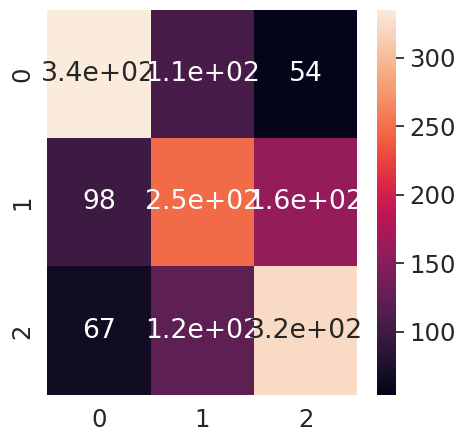

In [ ]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val_labels, val_prediction)

fig, ax = plt.subplots(figsize=(5,5))        
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_for_ML_GLCM_2, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='auto',
                       n_estimators=621)

In [ ]:
best_grid = rf_random.best_estimator_
best_grid.fit(X_for_ML_GLCM_2, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(bootstrap=False, max_depth=30, max_features='auto',
                       n_estimators=621)

In [ ]:
# X_for_ML_GLCM_2.columns = X_for_ML_GLCM_2.columns.map(str)
# # Fit the model on training data
# best_grid.fit(X_for_ML_GLCM_2, y_train) #For sklearn no one hot encoding

# #Predict on train
# best_grid = rf_random.best_estimator_
# best_grid.fit(X_for_ML_GLCM_2, y_train)
train_prediction = best_grid.predict(X_for_ML_GLCM_2)
#Inverse le transform to get original label back. 
train_prediction_RS = le.inverse_transform(train_prediction)
y_train_labels_RS= le.inverse_transform(y_train)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_RS))
print ("Accuracy = ", metrics.accuracy_score(y_train_labels_RS, train_prediction_RS))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_train_labels_RS, train_prediction_RS))

Accuracy =  1.0
Accuracy =                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1487
         1.0       1.00      1.00      1.00      1513
         2.0       1.00      1.00      1.00      1537

    accuracy                           1.00      4537
   macro avg       1.00      1.00      1.00      4537
weighted avg       1.00      1.00      1.00      4537



In [ ]:
# val_for_RF = feature_extractor(x_val_binned)
# val_for_RF.columns = val_for_RF.columns.map(str)

#Predict on val
val_prediction = best_grid.predict(val_for_RF)
#Inverse le transform to get original label back. 
val_prediction_RF = le.inverse_transform(val_prediction)
y_val_labels_RF= le.inverse_transform(y_val)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels_RF, val_prediction_RF))
print ("Accuracy = ", metrics.accuracy_score(y_val_labels_RF, val_prediction_RF))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_val_labels_RF, val_prediction_RF))

Accuracy =  0.6292134831460674
Accuracy =                precision    recall  f1-score   support

         0.0       0.70      0.69      0.70       496
         1.0       0.56      0.52      0.54       505
         2.0       0.62      0.68      0.65       512

    accuracy                           0.63      1513
   macro avg       0.63      0.63      0.63      1513
weighted avg       0.63      0.63      0.63      1513



In [ ]:
# #Predict on val data
# #Extract features from val data and reshape, just like training data
# # val_features = feature_extractor(x_val)
# # val_features = np.expand_dims(val_features, axis=0)
# # val_for_RF = np.reshape(val_features, (x_val.shape[0], -1))

# #Predict on val
# val_prediction = best_grid.predict(val_for_RF)
# #Inverse le transform to get original label back. 
# val_prediction = le.inverse_transform(val_prediction)
# y_val_labels= le.inverse_transform(y_val)

# #Print overall accuracy
# from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction))
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction))
# print ("Accuracy = ", classification_report(y_val_labels, val_prediction))